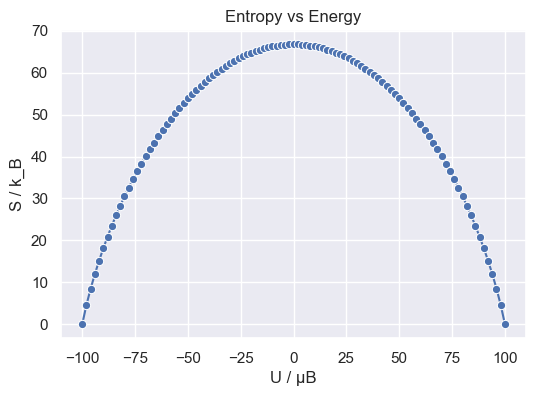

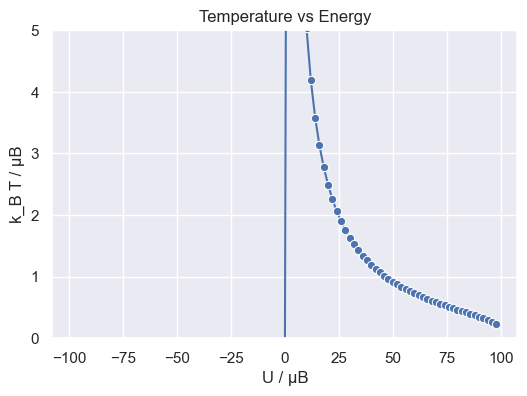

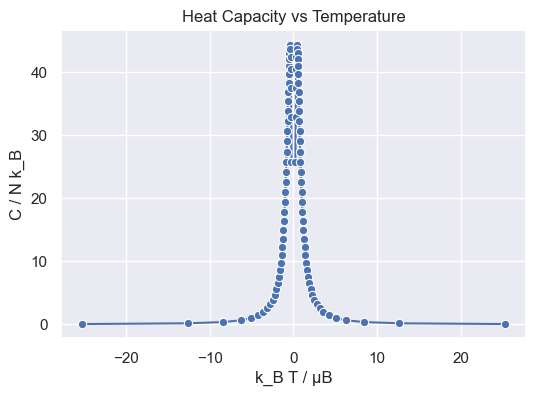

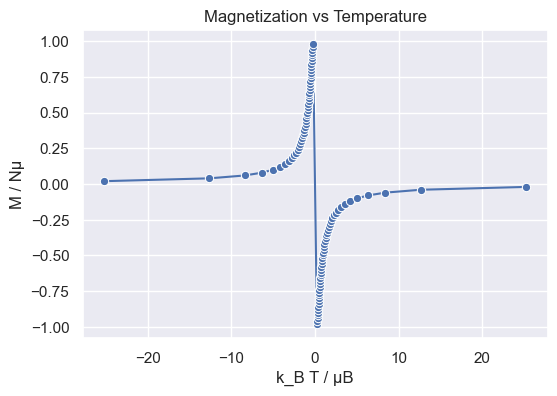

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import comb
pd.set_option('display.max_rows', 200)

# Function to compute table
def compute_table(N=100):
    k_B = 1  # Setting Boltzmann constant to 1 for simplicity
    
    data = []
    for N_up in range(N+1):
        N_down = N - N_up
        
        # Energy per unit magnetic moment
        U_muB = -(N_up - N_down)  # U / μB
        
        # Magnetization per dipole moment
        M_Nmu = (N_up - N_down) / N  # M / Nμ
        
        # Multiplicity (number of microstates)
        Omega = comb(N, N_up, exact=True)  # Ω = N! / (N_up!(N-N_up)!)
        
        # Entropy per Boltzmann constant
        S_kB = np.log(float(Omega)) if Omega > 0 else 0  # S / k_B = ln(Ω)
        
        # Effective temperature (approximated using finite differences)
        if 1 <= N_up < N:
            dS_dU = (np.log(comb(N, N_up+1)) - np.log(comb(N, N_up-1))) / 2  
            kB_T_muB = 1 / dS_dU if dS_dU != 0 else np.inf  # k_B T / μB
        else:
            kB_T_muB = np.inf  # Ends where the temperature is ill-defined
        
        # Heat capacity per dipole
        if 1 <= N_up < N:
            d2S_dU2 = (np.log(comb(N, N_up+1)) - 2*np.log(comb(N, N_up)) + np.log(comb(N, N_up-1)))
            C_NkB = -1 / (d2S_dU2 * (kB_T_muB ** 2)) if d2S_dU2 != 0 else 0  # C / N k_B
        else:
            C_NkB = 0  # Zero at extreme ends
        
        data.append([N_up, U_muB, M_Nmu, Omega, S_kB, kB_T_muB, C_NkB])
    
    df = pd.DataFrame(data, columns=["N_up", "U/muB", "M/Nmu", "Omega", "S/kB", "kB T/muB", "C/NkB"])
    return df

# Generate the table
df = compute_table()

# Set Seaborn style
sns.set(style="darkgrid")

# Plot 1: Entropy vs. Energy
plt.figure(figsize=(6, 4))
sns.lineplot(x=df["U/muB"], y=df["S/kB"], marker="o")
plt.xlabel("U / μB")
plt.ylabel("S / k_B")
plt.title("Entropy vs Energy")
plt.show()

# Plot 2: kB T / μB vs U / μB
plt.figure(figsize=(6, 4))
sns.lineplot(x=df["U/muB"], y=df["kB T/muB"], marker="o")
plt.xlabel("U / μB")
plt.ylabel("k_B T / μB")
plt.title("Temperature vs Energy")
plt.ylim(0, 5)  # Adjusted to avoid infinity values
plt.show()

# Plot 3: C / NkB vs kB T / μB
plt.figure(figsize=(6, 4))
sns.lineplot(x=df["kB T/muB"], y=df["C/NkB"], marker="o")
plt.xlabel("k_B T / μB")
plt.ylabel("C / N k_B")
plt.title("Heat Capacity vs Temperature")
plt.show()

# Plot 4: M / Nμ vs kB T / μB
plt.figure(figsize=(6, 4))
sns.lineplot(x=df["kB T/muB"], y=df["M/Nmu"], marker="o")
plt.xlabel("k_B T / μB")
plt.ylabel("M / Nμ")
plt.title("Magnetization vs Temperature")
plt.show()


In [4]:
df.head(101)


,N_up,U/muB,M/Nmu,Omega,S/kB,kB T/muB,C/NkB
0,0,100,-1.00,1,0.000000,inf,0.000000
1,1,98,-0.98,100,4.605170,0.235097,25.729428
2,2,96,-0.96,4950,8.507143,0.270697,32.835114
3,3,94,-0.94,161700,11.993498,0.299636,37.384030
4,4,92,-0.92,3921225,15.181915,0.325556,40.406254
5,5,90,-0.90,75287520,18.136825,0.349832,42.382802
6,6,88,-0.88,1192052400,20.898942,0.373169,43.592205
7,7,86,-0.86,16007560800,23.496327,0.395997,44.215086
8,8,84,-0.84,186087894300,25.949485,0.418610,44.377334
9,9,82,-0.82,1902231808400,28.274049,0.441225,44.171247
